# MSIN0097 Individual Coursework Submission 

## Table of Contents

* [1. Obesity Classification Project](#chapter1)


* [2. Get the Data](#chapter1)


* [3.Explore the Data](#chapter1)
    * [a) Renaming Attributes](#section_1_1)
    * [b) Status](sSection_1_2)
    * [c) Age](sSection_1_2)
    * [d) Gender](sSection_1_2)
    * [e) Experimenting with attribute combinations](sSection_1_2)
        * [BMI](sSection_1_2)
    * [f) Converting text categorical atributes to numbers](sSection_1_2)
    * [g) Exploring the data with all attributes as numerical values](sSection_1_2)
    
    
       
* [4. Prepare the data for Machine Learning algorithms ](#chapter2)
    * [a) Stratify Sample](#section_2_1)
    * [b) Split Data](#section_2_2)
    * [c) Feature Scaling](sSection_1_2)
    * [d) Dimentionality Reduction](sSection_1_2)
    
    
    
* [5. Select and Train Models](#chapter2)
    * [ Decision Tree Classifier](#chapter2)
    * [ Random Forrest Classifier ](#chapter2)
    * [ Softmax Regression ](#chapter2)
    * [ Support Vector Machine Classifer ](#chapter2)
    * [ KMeans Clustering ](#chapter2)



* [6. Fine Tune Models ](#chapter2)



* [7. Evaluation ](#chapter2)
    

# 1. Obesity Classification Project  <a class="anchor" id="Obesity Classification Project"></a>

This project aims to predict the weight status of individuals from the countries of Mexico, Peru and Columbia based on physical condition and a number of behavioural habits that the subjects currently inhabit. 

The data was collected with a view to be used to generate intelligent computational tools to identify the obesity level of an individual. During the course of this project we attempt to conduct the preliminary modelling to build a recommendation system that can measure obesity levels for health officials and General Practitioners in the Mexico, Peru and Columbia. 

Word Count = 1998 



# 2. Get the Data <a class="anchor" id="2. Get the Data"></a>

The data set was sourced from: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+. 

The data is made up of 17 attributes. The names are as follows;
- Gender (Male,Female)
- Age (Years)
- Height (Meters)
- Weight (Kg)
- Famiy history with Obesity (yes/no)
- FAVC = Frequency of highly calorific food consumption(Yes,No)
- FCVC = Frequency of vegetables consumed (1-3)
- NCP = Number of main meals (0-4)
- CAEC = Consumption of food between meals (always, frequently, no, sometimes)
- CH20 = Consumption of water daily in litres (1= less than 1, 2= 1-2, 3= 2 or more)
- SCC = Calorie consumption monitoring (Yes,no)
- FAF = Frequency of exercise (0-3)
- TUE = technology use (0-2)
- CALC = consumption of alcohol (No, sometimes, frequently, always)
- MTRANS = Method of Transport 
- Status = Normal Weight, Overweight, Obese

The 'Status' attribute is the label for the data set. 

First we prepare the notebook by importing modules and packages that are necessary for our analysis and modelling. 



In [95]:
#data visualisation and manipulation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# to make this notebook's output stable across runs
np.random.seed(42)

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#necessary modelling algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans



#model visualisations
!pip install dtreeviz;
!apt-get install graphviz;
!pip install mlxtend ; 
from mlxtend.plotting import plot_decision_regions;

#model evalutation and hypertuning
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Sample code
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML





'apt-get' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Invalid requirement: ''


The CSV file is read, converted to a dataframe. The attributes are checked for null values and we take a quick glance a the data.
There are 2111 instances with 17 attributes.

In [96]:
#Import and Read CSV File 
df = pd.read_csv("C://Programming/ObesityDataSet_raw.csv")

In [97]:
data = pd.DataFrame(df)

In [98]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Status
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [100]:
#Check for null values
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Status                            0
dtype: int64

In [101]:
#Check shape of data 
data.shape

(2111, 17)

# 3. Explore the Data 

We take a more in-depth look at the data and use visualisations to understand how best to manipulate the data. Columns are renamed. A histogram series is plotted to understand the basic distribution of each numerical attribute. 

### 3a) Renaming Attributes

In [102]:
#rename column names 
data = data.rename(columns={"family_history_with_overweight": "family_history", "FAVC": "high_cal_cons", "FCVC": "Veg_cons","NCP": "main_meals","CAEC": "snacking","SMOKE": "smoker","CH2O": "water_cons","SCC": "cal_monitor","FAF": "physical_act","TUE": "Tech_cons","CALC": "alcohol_cons","MTRANS": "work_transport" })
data.head()

,Gender,Age,Height,Weight,family_history,high_cal_cons,Veg_cons,main_meals,snacking,smoker,water_cons,cal_monitor,physical_act,Tech_cons,alcohol_cons,work_transport,Status
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight


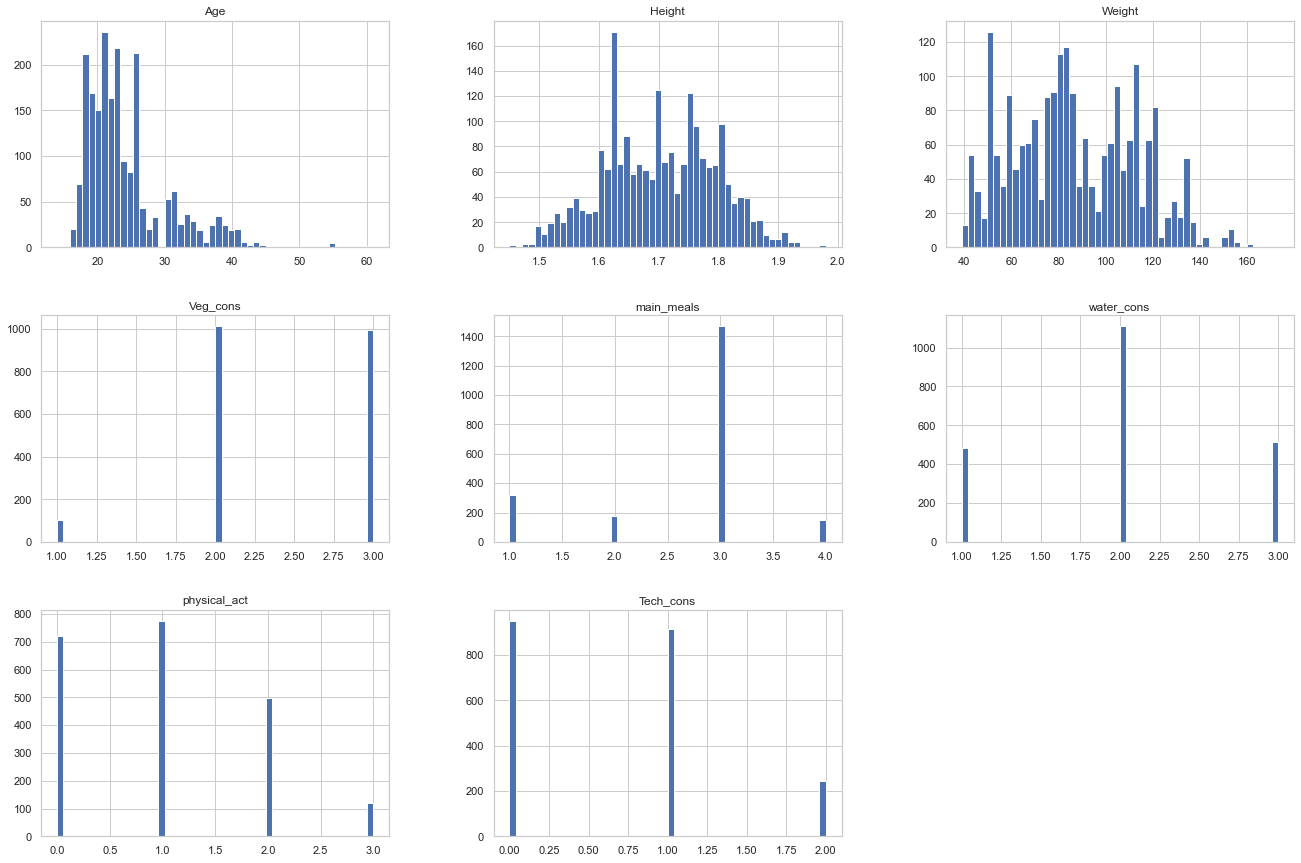

In [103]:
#can also quickly get a feel for the data by plotting a histogram 
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

The histograms show the distribution for the numerical attributes. Important features to note;
- Instances seem to be skewed towards the younger ages. 
- Height and Weight seem uniformly distributed. 
- Vegetable consumption of frequency of meals is high. 

We take a closer look at individual attributes

### 3b) Status 


In [10]:
data.Status.value_counts()

Obesity          972
Overweight       580
Normal_Weight    559
Name: Status, dtype: int64

Percentage of instances with Normal body weight: 26.48%
Percentage of instances with an Obese status: 46.04%
Percentage of instances with an overweight status: 27.48%


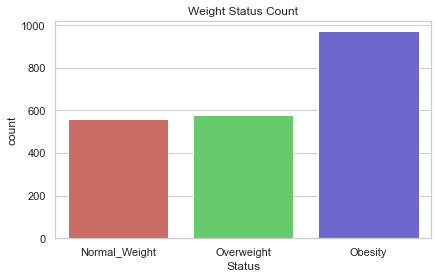

In [11]:
#Bar chart showing number of people with normal weight, overweight, and obese status 
sns.countplot(x="Status", data=data, palette="hls").set_title("Weight Status Count")
count_overweight = len(data[data.Status == 'Overweight'])
count_Normal_weight = len(data[data.Status == 'Normal_Weight'])
count_Obese = len(data[data.Status == 'Obesity'])
print("Percentage of instances with Normal body weight: {:.2f}%".format((count_Normal_weight / (len(data.Status))*100)))
print("Percentage of instances with an Obese status: {:.2f}%".format((count_Obese / (len(data.Status))*100)))
print("Percentage of instances with an overweight status: {:.2f}%".format((count_overweight / (len(data.Status))*100)))



**Figure 1.** A bar chart showing the frequency of each weigth status shows the that of the data sample, nearly 50% of instances are obese. 

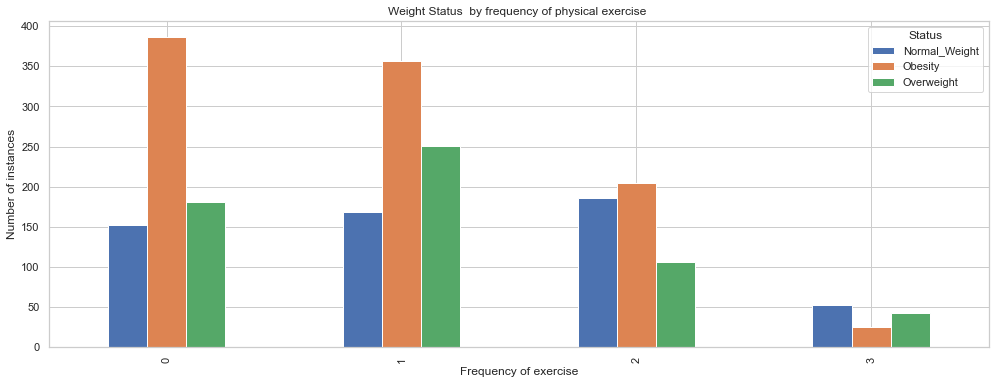

In [12]:
#Bar chart of physical activity frequency vs weigth status 
pd.crosstab(data.physical_act,data.Status).plot(kind="bar",figsize=(15,6))
plt.title('Weight Status  by frequency of physical exercise ')
plt.xlabel('Frequency of exercise')
plt.ylabel('Number of instances')
plt.show()

**Figure 2**. Bar chart highlighting that as the frequency of physical activity increases, the frequency of obesity amongst instances decreases. 

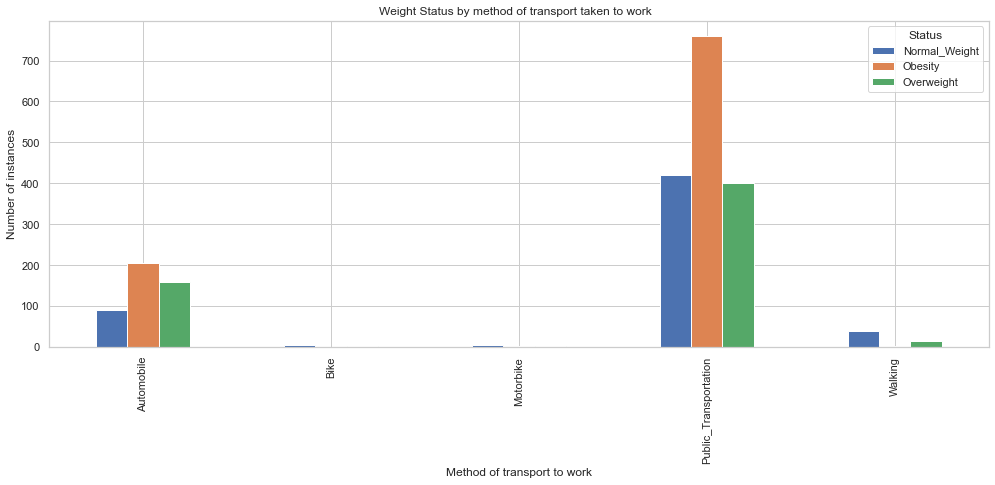

In [13]:
#Bar chart of method of transport to work vs weight status 
pd.crosstab(data.work_transport,data.Status).plot(kind="bar",figsize=(15,6))
plt.title('Weight Status by method of transport taken to work')
plt.xlabel('Method of transport to work')
plt.ylabel('Number of instances')
plt.show()

**Figure 3**. Bar chart of Weight Status vs method of transport taken to work. This highlights that most people take public transport to work within the sample. We cant make any correlations at this point as the sample might be extremely biased or this could be a characterstic of workers in the sample location. 

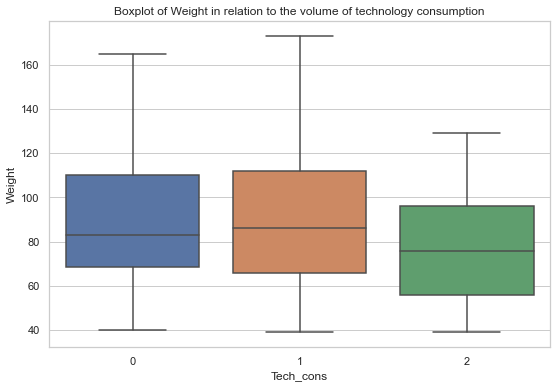

In [93]:
#Box Plot of Tech consumption vs Age 
plt.subplots(figsize=(8, 6))
sns.boxplot(x="Tech_cons", y="Weight", data=data)
plt.title('Boxplot of Weight in relation to the volume of technology consumption')
plt.show()


**Figure 4.** Box plot showing Weight decrease with tech consumption. This may be indicative that those of a younger age have a greater tech consumption, with the younger age reducing the weight of high tech consumers within the sample. 

### 3c) Age

In [15]:
#table of means 
data_means = data.groupby('Status').mean()
data_means.head()

,Age,Height,Weight,Veg_cons,main_meals,water_cons,physical_act,Tech_cons
Status,,,,,,,,
Normal_Weight,20.776386,1.683631,56.209302,2.422182,2.830054,1.855098,1.246869,0.756708
Obesity,25.824074,1.715360,109.084362,2.516461,2.711934,2.088477,0.863169,0.620370
Overweight,25.200000,1.695931,78.168966,2.268966,2.510345,2.044828,1.015517,0.650000


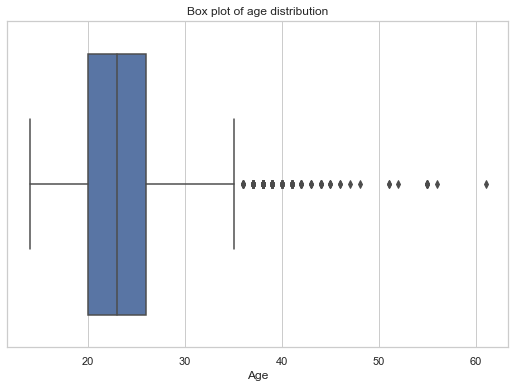

In [104]:
#Boxplot to show distribution of age 
plt.subplots(figsize=(8, 6))
sns.boxplot(x=data["Age"])
plt.title('Box plot of age distribution')
plt.show()

**Figure 5.** Box plot which shows the skewed ages of the sample. Highlights mostly young people took part in the data collection process. This will need to be stratified prior to any modelling. 

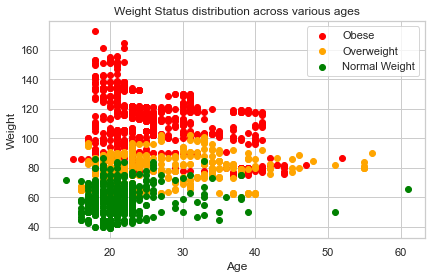

In [105]:
#Scatter plot of age and weigth status
plt.scatter(x=data.Age[data.Status== "Obesity"], y=data.Weight[(data.Status== "Obesity")], c="red")
plt.scatter(x=data.Age[data.Status== "Overweight"], y=data.Weight[(data.Status== "Overweight")], c="orange")
plt.scatter(x=data.Age[data.Status== "Normal_Weight"], y=data.Weight[(data.Status== "Normal_Weight")], c= "green")
plt.legend(["Obese", "Overweight","Normal Weight"])
plt.title('Weight Status distribution across various ages')
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()


**Figure 6.** Scatter plot demonstrating the divides in Weight status based on weight and age. Nature of the sample age bias means that no correlation is seen between age and Weight as all weight statuses are fairly populated at the average age of the sample. 

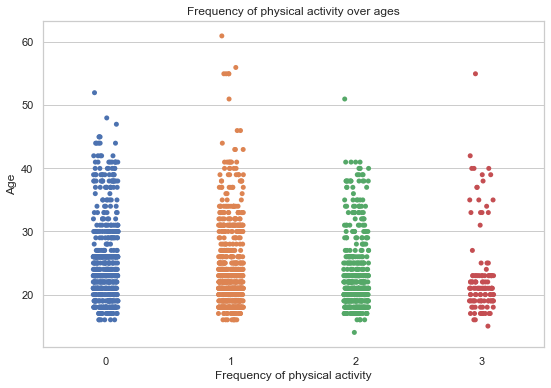

In [106]:
# Strip plot of physical activity frequency vs Age for 3 weight categories
plt.subplots(figsize=(8, 6))
sns.stripplot(x="physical_act", y="Age", data=data)
plt.xlabel("Frequency of physical activity")
plt.title('Frequency of physical activity over ages')
plt.show()


**Figure 7.** Strip plot that shows as age increases, the number of people doing high frequencies of physical activity decreases. 

### 3d) Gender

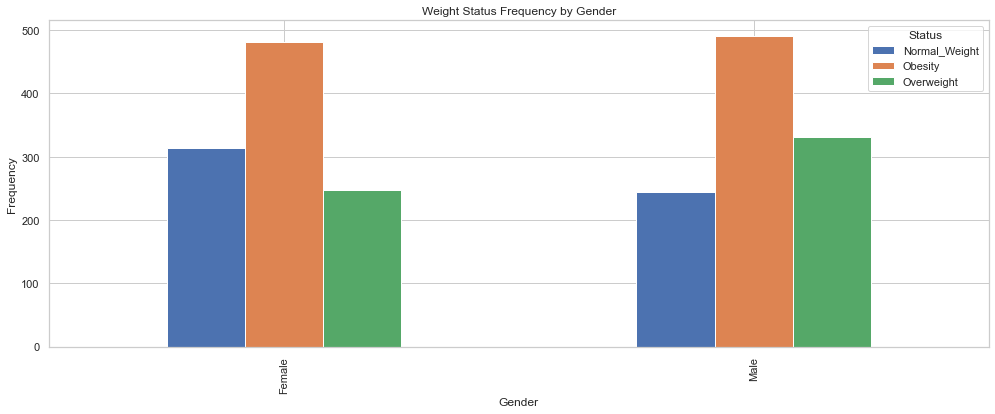

In [19]:
#Plot bar chart of Gender vs Weight Status
pd.crosstab(data.Gender,data.Status).plot(kind="bar",figsize=(15,6))
plt.title('Weight Status Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

**Figure 8.** Bar Chart of the frequency of each weight status for each Gender. 

From the series of visualisations can confirm that;
- The greater the frequency of exercise the lower the levels of obesity.
- Frequency of exercise decreases with age.
- Obesity is split equally between genders, however more men are in the overweight category.
- The sample age is greatly skewed towards the mid 20's. 


### 3e) Experimenting with Attribute combinations 

To gain further insights, we experimented by combining attributes. A metric that is commonly used for physiological evaluations is BMI(Body Mass Index). The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². 

From the existing attributes, height and weight, we can produce a BMI metric and investigate its relevance with Weight Status. 

It is important we test out combinations of attributes because Height, for example, may not be a great predictor of weight status. However as a function of Weight, it may have predicting power. 

### BMI 

In [20]:
#Create new attribute 'BMI'
data["BMI"] = (data["Weight"]/(data["Height"])**2)
data.head()

,Gender,Age,Height,Weight,family_history,high_cal_cons,Veg_cons,main_meals,snacking,smoker,water_cons,cal_monitor,physical_act,Tech_cons,alcohol_cons,work_transport,Status,BMI
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight,26.851852
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight,28.405504


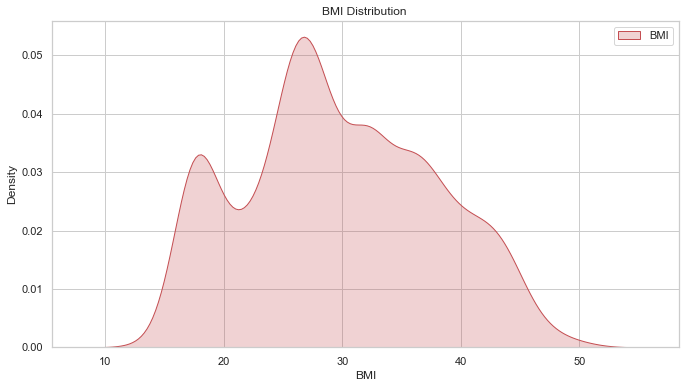

In [21]:
#Plot distribution of BMI across sample 
plt.subplots(figsize=(10,6))
x = data['BMI']
x = pd.Series(x, name="BMI")
ax = sns.kdeplot(x, shade=True, color='r')
plt.title('BMI Distribution ')
plt.legend(["BMI"])
plt.show()

**Figure 9.** Density plot to highlight the distribution of BMI 

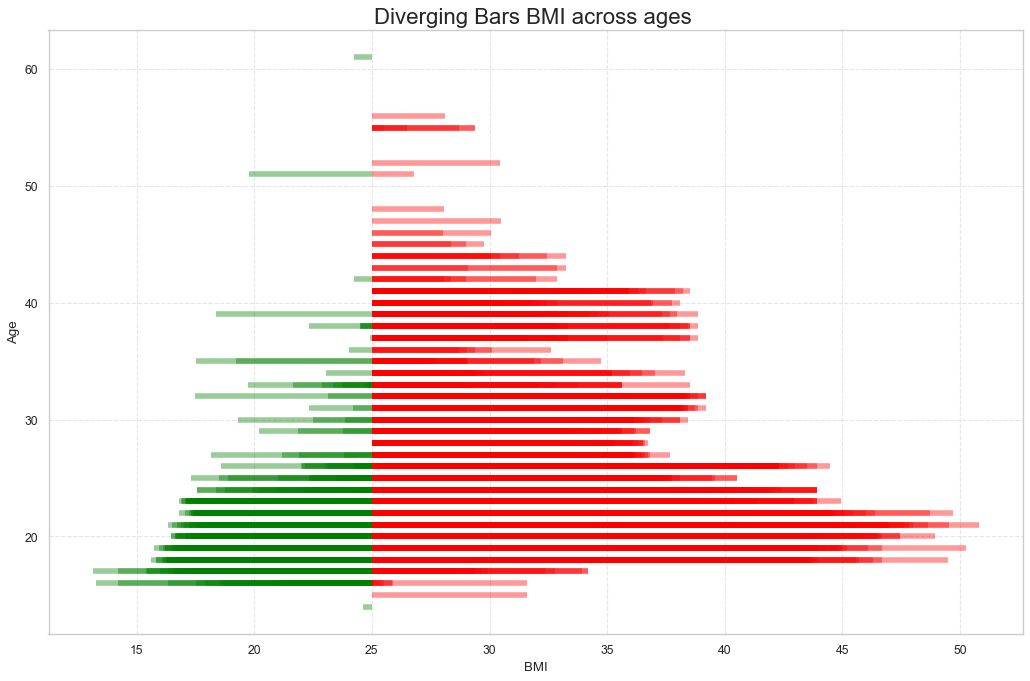

In [22]:
#Plot of divergent bars graph
df['colors'] = ['red' if x > 25 else 'green' for x in data['BMI']]
plt.figure(figsize=(14,10), dpi= 80)
#obesity threshold set at 25
plt.hlines(y=data.Age, xmin=25, xmax=data.BMI, color=df.colors, alpha=0.4, linewidth=5)

#Labels
plt.gca().set(ylabel='Age', xlabel='BMI')
plt.title('Diverging Bars BMI across ages ', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Figure 10.** 2-sided bar chart to reflect the number of people in the sample with a BMI greater than 25 / overweight. 

The new attribute 'BMI', from the visualisations above, appropriately reflects the distribution of weight status within the sample. We can therefore confidently add this to predictors used in our modelling. 

## 3f) Converting text categorical attributes to numbers

Thus far, we have worked mainly with our numerical attributes. We must convert our text attributes into numerical attributes to conduct correlation tests to see which attributes may possess the greatest predicting power. However, correlation tests can only identify linear correlations and will be treated as reference only. Numerical attributes are also required for the Machine Learning models employed at a latter stage in the project. 

Furthermore, computational programming was used to convert these text attributes to numerical attributes instead of using OneHotEncoder and OrdinalEncoder functions. This is because we required the attributes to be assigned the appropriate number as the value carries weight in these behavioural instances. 

In [23]:
# Convert column Status from categorical and text to numerical 
data['Status_num'] = data['Status'].apply(lambda x: ['Normal_Weight', 'Overweight', 'Obesity'].index(x))
data = data.drop(['Status'], axis=1)

#Convert column work_transport from text to numerical 
data['work_transport_num'] = data['work_transport'].apply(lambda x: ['Automobile', 'Motorbike','Public_Transportation', 'Walking','Bike'].index(x))
data = data.drop(['work_transport'], axis=1)

#Convert column alcohol_cons from text to numerical
data['alcohol_cons_num'] = data['alcohol_cons'].apply(lambda x: ['no', 'Sometimes','Frequently', 'Always'].index(x))
data = data.drop(['alcohol_cons'], axis=1)

#Convert column alcohol_cons from text to numerical
data['cal_monitor_num'] = data['cal_monitor'].apply(lambda x: ['no', 'yes'].index(x))
data = data.drop(['cal_monitor'], axis=1)

#Convert column smoker from text to numerical
data['smoker_num'] = data['smoker'].apply(lambda x: ['no', 'yes'].index(x))
data = data.drop(['smoker'], axis=1)

#Convert column alcohol_cons from text to numerical
data['snacking_num'] = data['snacking'].apply(lambda x: ['no', 'Sometimes','Frequently', 'Always'].index(x))
data = data.drop(['snacking'], axis=1)

#Convert column high_cal_con from text to numerical
data['high_cal_num'] = data['high_cal_cons'].apply(lambda x: ['no', 'yes'].index(x))
data = data.drop(['high_cal_cons'], axis=1)

#Convert column family_history from text to numerical
data['family history_num'] = data['family_history'].apply(lambda x: ['no', 'yes'].index(x))
data = data.drop(['family_history'], axis=1)

#Convert column high_cal_con from text to numerical
data['Gender_num'] = data['Gender'].apply(lambda x: ['Female', 'Male'].index(x))
data = data.drop(['Gender'], axis=1)





In [24]:
data_encoded = data
data_encoded.head()

,Age,Height,Weight,Veg_cons,main_meals,water_cons,physical_act,Tech_cons,BMI,Status_num,work_transport_num,alcohol_cons_num,cal_monitor_num,smoker_num,snacking_num,high_cal_num,family history_num,Gender_num
0,21,1.62,64,2,3,2,0,1,24.386526,0,2,0,0,0,1,0,1,0
1,21,1.52,56,3,3,3,3,0,24.238227,0,2,1,1,1,1,0,1,0
2,23,1.80,77,2,3,2,2,1,23.765432,0,2,2,0,0,1,0,1,1
3,27,1.80,87,3,3,2,2,0,26.851852,1,3,2,0,0,1,0,0,1
4,22,1.78,90,2,1,2,0,0,28.405504,1,2,1,0,0,1,0,0,1


## 3g) Exploring the data with all attributes as Numerical Values 


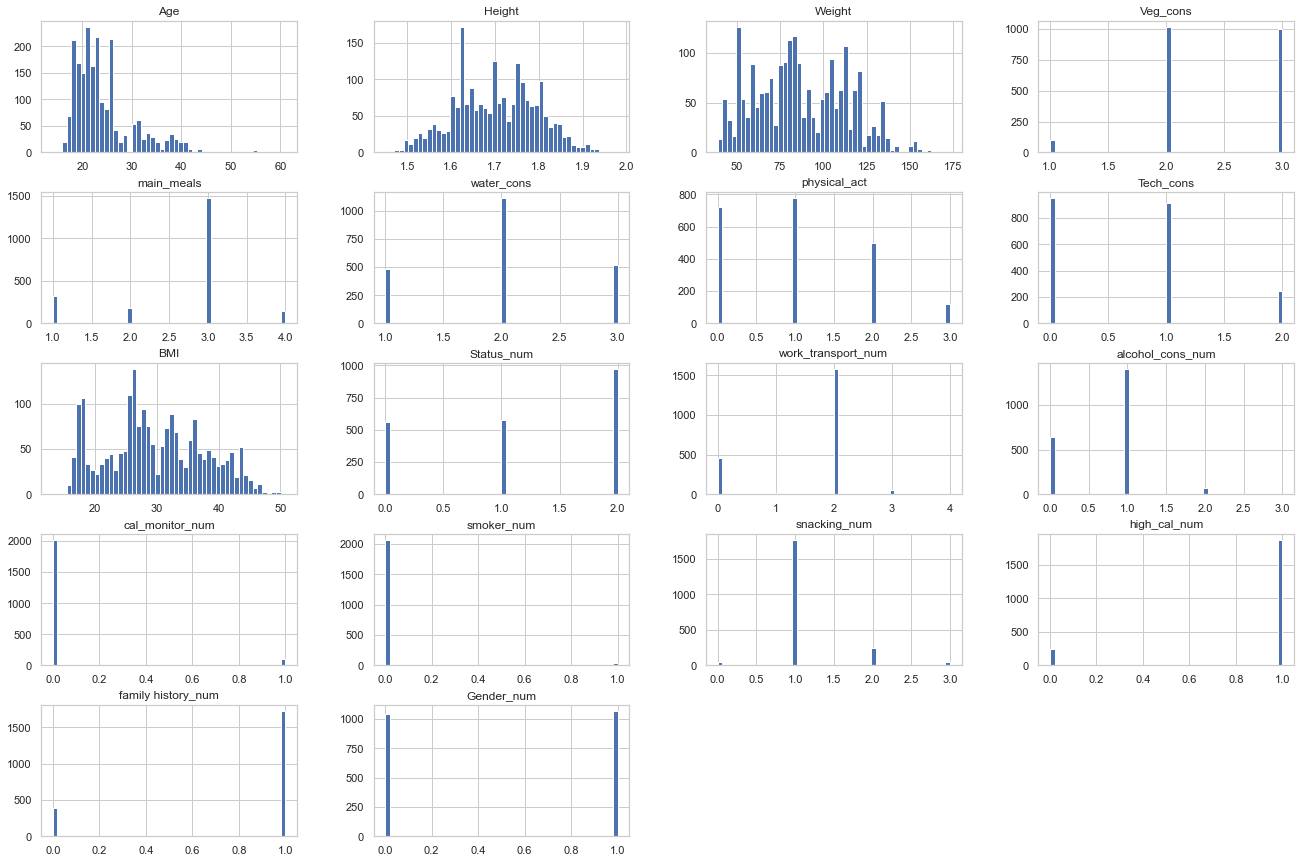

In [25]:
#can also quickly get a feel for the data by plotting a histogram 
%matplotlib inline
data_encoded.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
corr_matrix = data_encoded.corr()
corr_matrix["Status_num"].sort_values(ascending=False)

Status_num            1.000000
BMI                   0.899390
Weight                0.848007
family history_num    0.511098
Age                   0.309752
high_cal_num          0.283598
Height                0.143339
water_cons            0.133604
alcohol_cons_num      0.103055
Veg_cons              0.089187
Gender_num            0.042359
smoker_num           -0.002433
main_meals           -0.039589
work_transport_num   -0.066612
Tech_cons            -0.080139
physical_act         -0.174757
cal_monitor_num      -0.185938
snacking_num         -0.367379
Name: Status_num, dtype: float64

Although the histograms of all the attributes, now they are numerical, dont offer any new insights into the data, the correlation test shows a high correlation between BMI and weight status. This confirms that combining the Weight and Height attribute to form BMI will help increase the predicting power of future models. 

Text(0.5, 1.0, 'Correlation between different fearures')

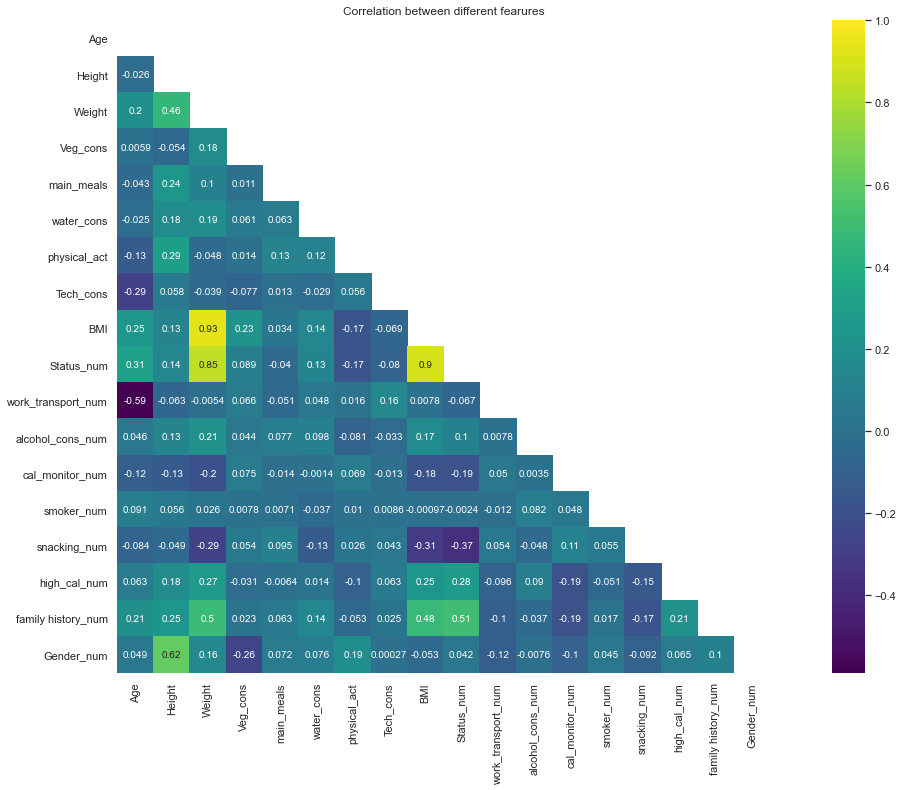

In [27]:
mask = np.zeros_like(data.corr())
mask[np.tril_indices_from(mask)] = True

plt.subplots(figsize=(20, 12))
corr = data.corr()
sns.heatmap(corr_matrix, vmax=1, square=True,annot=True,cmap='viridis', mask=mask.T)

plt.title('Correlation between different fearures')

The visualisation of the correlation matrix also highlights the negative correlation between snacking frequency and weight status, in addition to the positive correlation between weight status and family history of obesity. 

# 4. Prepare the data for Machine Learning algorithms


Next, the data is prepared in order to be utlilised by our Machine Learnign algorithms. The data is also split into a test and training set and appropriately scaled. 



## 4a) Stratify Sample

Before splitting the data, it is important to reflect on the skewed nature of the data as noted in our visualisations and in the histogram of 'Age' below. We stratify the age attribute to ensure that the test set can be as representative of the data set as a whole to minimise any sampling bias when the data is split into test and training sets. 

Although, in this case, the strafying power is limited as the data set is small and we want to avoid creating null values, the age attribute is slightly more evenly distributed as a result. 

<AxesSubplot:>

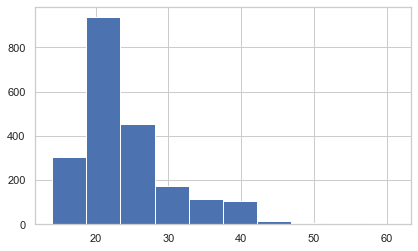

In [28]:
#demonstrating need for stratified sampling sometimes
data_encoded["Age"].hist()

<bound method IndexOpsMixin.value_counts of 0       20.0
1       20.0
2       22.5
3       25.0
4       20.0
        ... 
2106    20.0
2107    20.0
2108    22.5
2109    22.5
2110    22.5
Name: Age, Length: 2111, dtype: category
Categories (11, float64): [15.0 < 17.5 < 20.0 < 22.5 ... 32.5 < 35.0 < 37.5 < 42.0]>

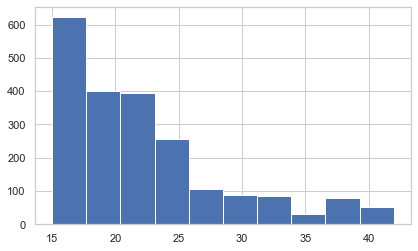

In [29]:
#bins are selected as to minimise the production of null values 
data_encoded["Age"] = pd.cut(data_encoded["Age"],
                               bins=[13., 17.5, 20, 22.5, 25., 27.5,30.,32.5,35.,37.5,40, 61],
                               labels=[15, 17.5, 20., 22.5, 25, 27.5,30,32.5,35,37.5,42])
data_encoded["Age"].hist()
data_encoded["Age"].value_counts

In [79]:
#confirm stratification does not induce null values
data_encoded.isnull().sum()

Age                   0
Height                0
Weight                0
Veg_cons              0
main_meals            0
water_cons            0
physical_act          0
Tech_cons             0
BMI                   0
Status_num            0
work_transport_num    0
alcohol_cons_num      0
cal_monitor_num       0
smoker_num            0
snacking_num          0
high_cal_num          0
family history_num    0
Gender_num            0
dtype: int64

## 4b) Splitting the data 

Next, we set aside part of the data set using Scikit Learn's test_train_split() function. 20% of the instances within the data set will be picked at random to form the test set. As a result, the machine learning algorithms can be fit to the training data and their predicting power can be evaluated on the test data. 

In [84]:
#X and y represent the predictors and labels
X = data_encoded.drop('Status_num', axis = 1)
y = data_encoded.Status_num

#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#confirm length of test and train sets 
len(X_train)
len(X_test)
print(len(X_train), "train +", len(X_test), "test")
print(len(y_train), "train +", len(y_test), "test")

1688 train + 423 test
1688 train + 423 test


The data is split into 'X' and 'y' sets with 'X' being the predictors and 'y' being the labelled data. The length of the training and test set is checked so to be consistent for X and y values. 

## 4c) Feature Scaling 

Feature scaling is applied to the test and train predictors. This is of paramount importance to the validity of our modelling as Machine Learning algorithms don't perform particularly well when the predicting attributes have very different scales.This is because one or several features can dominate the other features in magnitude and the resulting impact is that the model does not pick up the contribution of the attributes on a smaller scale.  

From our prior insights into the data and due to the nature of the data collection methods used, our attributes are of vastly different scales; Height(m), Weight(kg) and behevioural features on varied scales of 0-4. The two methods we can use are;

- MinMax scaling/ Normalisation
- Standardization 

Although normalisation bounds values by a range of 0-1, which is useful for some Machine Learning models, it is much more affected by skewed data and outliers. Therefore we used Standardisaition which subtracts the mean value and then divides by the standard deviation. 





In [85]:
#standardise data with standard scalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [86]:
#check for any null values produced
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

In [87]:
# np.nan_to_num(X_train)
X = X.values.astype(np.float)
y = y.values.astype(np.float)

## 4d) PCA / Dimensionality Reduction 

The final part of our data preperation is to conduct dimentionality reduction. Although this speeds up training, the main reason for this is to enhance our data visualisation of our models' decision boundaries. We reduce the number of dimensions down to two so they can be viewed graphically. 

Principal Component Analysis algorithm is used to reduce the dimentionality of the data set to two dimensions as it automatically centres the data. 

In [35]:
pca = PCA(n_components = 2)
X_train_reduced = pca.fit_transform(X_train)

We fit the PCA classifier on our training data and transform the test set prior to fitting each model with the pre-fitted PCA. 




# 5. Select and train models

Now we have gained insights into our data and prepared the data for modelling, we can know select models that can be trained on our training data and predict the weigth status of instances based on the values of the 17 attributes.  

The models we will employ, due to the nature of the task will need to be able to perform multiclass calssification tasks. This is because our model outputs will be; "Normal Weight, Overweight, Obese". 

We will employ two performance measures that are appropriate to our classification task;
- Accuracy 
- F1 score

Accuracy, the ratio of correct predictions, is a basic performance measure used for classification tasks. It is reliable, yet trivial as we will want to factor in how the model is predicting potential outputs wrong. 

F1 score, is the harmonic mean of precision and recall and gives more weight to low values. As a result a high F1 score is produced only when both precision and recall metrics for the classifier are high. Furthermore, the F1 score is appropriate as it gives no preference to precision or recall. In this scenerio, as weight prediction is not of immediate medical emergency and more of a long term problem, neither recall or precision maintains a higher weight or cost of negligence. 



Convert 'y_test' to a numpy array for visualisations, so to avoid errors.


In [36]:
#Convert y to numpy array 
y_test = y_test.to_numpy()

We begin by using algorithms that are natively capable of handling multiclass classification tasks as baseline models(Decision Trees, Random Forrest, Logistic regression)

### Decision tree classifier

A Decision Tree Classifier is trained on the dimension reduced training data. The maximum number leaf nodes is set to 3.

In [37]:
#Fit decision tree classifier

X = X_train_reduced
y = y_train

tree_clf = DecisionTreeClassifier(max_leaf_nodes=3,random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [38]:
# transform new data using already fitted pca
# (don't re-fit the pca)
X_test_reduced= pca.transform(X_test)


#calculate accuracy score
y_pred = tree_clf.predict(X_test_reduced)
decision_tree_base_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier has an accuracy score of {:0.2f}%.'.format( 100 * decision_tree_base_accuracy))
#accuracy_scores[decision_tree] = accuracy_score(y_test, y_pred)


##calculate f1 score
decision_tree_base_f1_score = f1_score(y_test, y_pred,average='macro')
print('Decision Tree Classifier has an f1 score of {:0.2f}%.'.format( 100 * decision_tree_base_f1_score))


#f1_scores[decision_tree] = decision_tree_base_f1_score

Decision Tree Classifier has an accuracy score of 72.34%.
Decision Tree Classifier has an f1 score of 67.44%.


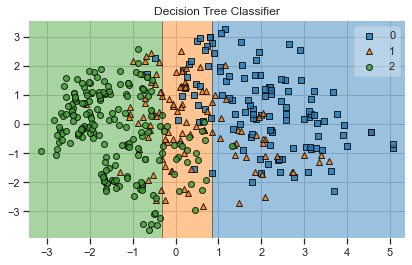

<Figure size 1800x1440 with 0 Axes>

In [39]:
#plot decision boundary of decision tree
plot_decision_regions(X_test_reduced, y_test, clf=tree_clf,zoom_factor=3.5);
plt.title('Decision Tree Classifier' )
plt.figure(figsize=(25, 20))
plt.show();


The trained decision tree classifier is trained on our training set and predicts the outputs/weight statuses of our test data, based on the input values of the 17 attributes. The classifier produces a 72.34% accuracy and a f1 score of 67.44%. As Decision trees make very few assumptions about the training data, the tree structure can fit very closely and can overfit the training data. This induces poor performance when predicting outputs for the test set. We will investigate this further with the Random Forrest classifier. 

### Softmax Regression 

We fit a logistic regression model to our training data. The Softmax regression is the logidtic regression capable of combining multiple binary classifiers and by predicting the class with the highest estimated probability. 

In [43]:
#fit Softmax Regression 
X = X_train_reduced
y = y_train

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=15, random_state=42)
softmax_reg.fit(X, y)

X_test_reduced= pca.transform(X_test)

y_pred_soft_max = softmax_reg.predict(X_test_reduced)
softmax_base_accuracy = accuracy_score(y_test, y_pred_soft_max)
print('Softmax Regression has an accuracy score of {:0.2f}%.'.format( 100 * softmax_base_accuracy))


##calculate f1 score
soft_max_base_f1_score = f1_score(y_test, y_pred_soft_max,average='macro')
print('Soft Max Regression has an f1 score of {:0.2f}%.'.format( 100 * soft_max_base_f1_score))



Softmax Regression has an accuracy score of 76.12%.
Soft Max Regression has an f1 score of 73.42%.


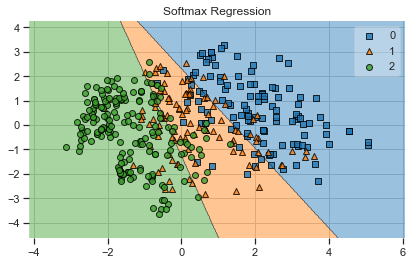

<Figure size 1800x1440 with 0 Axes>

In [44]:
#plot decision boundary of softmax regression 
plot_decision_regions(X_test_reduced, y_test, clf=softmax_reg);
plt.title('Softmax Regression' )
plt.figure(figsize=(25, 20))
plt.show();


The Softmax Classifier performs better than the Decision Tree Classifer with an accuracy score of 76.12% and a f1 score of 73.42%. This may be due to Logistic Regressions assuming the data is linear and not overfitting the training data. 

###  Random Forrest Classifier

A Random Forrest Classifier is fitted to the training data. This is an ensemble of Decision trees and results in greater tree diversity, and thus mroe likely to perform better when predicting outputs for the test data. 

In [45]:
#Fit Random Forrest Classifier 

X = X_train_reduced
y = y_train

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [46]:
# transform new data using already fitted pca
# (don't re-fit the pca)
X_test_reduced= pca.transform(X_test)


y_pred_rf = rnd_clf.predict(X_test_reduced)
rf_base_accuracy= accuracy_score(y_test, y_pred_rf)
print('Random Forrest Classifier has an accuracy score of {:0.2f}%.'.format( 100 * rf_base_accuracy))


##calculate f1 score
rf_base_f1_score = f1_score(y_test, y_pred_rf, average='macro')
print('Random Forrest Classifier has an f1 score of {:0.2f}%.'.format( 100 * rf_base_f1_score))



Random Forrest Classifier has an accuracy score of 76.36%.
Random Forrest Classifier has an f1 score of 73.45%.


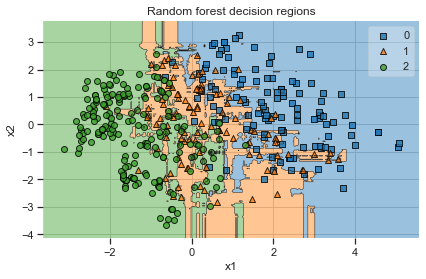

In [47]:
# Plotting decision regions
plot_decision_regions(X_test_reduced, y_test, clf=rnd_clf, zoom_factor=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random forest decision regions')
plt.show()

The Random Forrest Classifier performs better than the Decision Tree and Softmax Classifer with an accuracy score of 76.36% and a f1 score of 73.45%. 

### Support Vector Machine Classifier

A Support Vector Machine Classifer is trained on the training data. On small amounts of data, like in this case, SVM's perform well. However scaling these classifiers is difficult due to its OvR strategy. 

In [40]:
#Fit SVM classifier 
    
X = X_train_reduced
y = y_train

SVM =  SVC(gamma='auto',random_state=42)
SVM.fit(X, y)

SVC(gamma='auto', random_state=42)

In [41]:
X_test_reduced= pca.transform(X_test)

y_pred_SVM = SVM.predict(X_test_reduced)
SVM_base_accuracy = accuracy_score(y_test, y_pred_SVM)
print('SVM Classifier has an accuracy score of {:0.2f}%.'.format( 100 * SVM_base_accuracy))


##calculate f1 score
SVM_base_f1_score = f1_score(y_test, y_pred_SVM,average='macro')
print('SVM Classifier has an f1 score of {:0.2f}%.'.format( 100 * SVM_base_f1_score))


SVM Classifier has an accuracy score of 77.78%.
SVM Classifier has an f1 score of 74.29%.


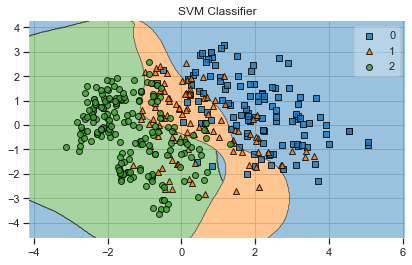

<Figure size 1800x1440 with 0 Axes>

In [42]:
#plot decision boundary of decision tree
plot_decision_regions(X_test_reduced, y_test, clf=SVM);
plt.title('SVM Classifier' )
plt.figure(figsize=(25, 20))
plt.show();

The SVM performs best of all the classifiers with an accuracy score of 77.78% and f1 score of 74.29%.

### KMeans Clustering

In [48]:
#Fit K Means clustering algorithm
X = X_train_reduced
k=3
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit(X)

In [49]:
y_pred_kmeans = kmeans.predict(X_test_reduced)
kmeans_base_accuracy = accuracy_score(y_test, y_pred_kmeans)
print('Kmeans Clustering has an accuracy score of {:0.2f}%.'.format( 100 * kmeans_base_accuracy))


##calculate f1 score
kmeans_base_f1_score = f1_score(y_test, y_pred_kmeans,average='macro')
print('Soft Max Regression has an f1 score of {:0.2f}%.'.format( 100 * kmeans_base_f1_score))



Kmeans Clustering has an accuracy score of 52.96%.
Soft Max Regression has an f1 score of 51.15%.


In [50]:
kmeans.cluster_centers_

array([[ 2.24510346,  0.13967682],
       [-0.69563045, -1.4944176 ],
       [-1.10502577,  0.91573457]])

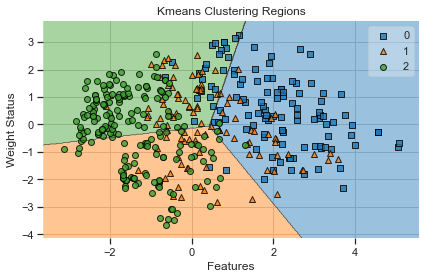

In [51]:
# Plotting decision regions
plot_decision_regions(X_test_reduced, y_test, clf=kmeans, zoom_factor=2)

# Adding axes annotations
plt.xlabel('Features')
plt.ylabel('Weight Status')
plt.title('Kmeans Clustering Regions')
plt.show()

Kmeans clustering was fit and evaluated in order to confirm that unsupervised learning methods were not needed in this classification task. This is evident by the low accuracy and f1 score of 52.96% and 51.16% respectively. 

# 6. Fine tune models

We can conclude that the two most appropriate classifiers from out initial modelling are the Random Forrest Classifier and the SVM classifier. Next we must hypertune the parameters of each model, to optimise their performance and then choose a final model. 

###  Random Forrest Classifier with GridSearchCV 

Grid Search CV was employed to evaluate all the possible combinations of the hyperparamter values. A Random SearchCV was employed but induced no improvement in the model. Furthermore we are exploring relativel few parameters so a GridSearch is more appropriate. 

In [89]:
#Set parameter grid 
param_grid = [
    {'n_estimators': [1000], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [True], 'n_estimators': [1000], 'max_features': [2, 3, 4]},
  ]

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    8.5s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [1000]},
                         {'bootstrap': [True], 'max_features': [2, 3, 4],
                          'n_estimators': [1000]}],
             verbose=1)

In [60]:
grid_search_cv.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=1000, random_state=42)

In [61]:
grid_search_cv.best_params_

{'max_features': 2, 'n_estimators': 1000}

In [62]:
#Apply the results of the grid search and implement model with best hyperparameters
X = X_train_reduced
y = y_train

rnd_clf_2 = RandomForestClassifier(max_features=2, n_estimators=1000, random_state=42)
rnd_clf_2.fit(X, y)

RandomForestClassifier(max_features=2, n_estimators=1000, random_state=42)

In [63]:
# transform new data using already fitted pca
# (don't re-fit the pca)
X_test_reduced= pca.transform(X_test)


y_pred_rf_2 = rnd_clf_2.predict(X_test_reduced)
rf_grid_accuracy= accuracy_score(y_test, y_pred_rf_2)
print('The grid seach parameter hypertuning has induced an improvement of {:0.2f}% in the model accuracy score.'.format( 100 * (rf_grid_accuracy - rf_base_accuracy) / rf_base_accuracy))


##calculate f1 score
rf_grid_f1_score = f1_score(y_test, y_pred_rf_2, average='macro')
print('The grid seach parameter hypertuning has induced an improvement of {:0.2f}% in the model f1 score'.format( 100 * (rf_grid_f1_score - rf_base_f1_score) / rf_base_f1_score))



The grid seach parameter hypertuning has induced an improvement of 1.24% in the model accuracy score.
The grid seach parameter hypertuning has induced an improvement of 1.97% in the model f1 score


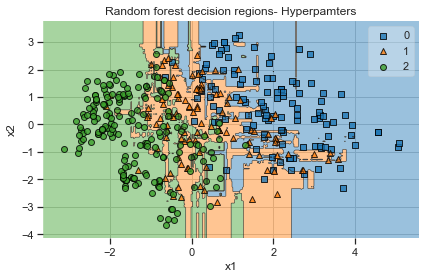

In [64]:
# Plotting decision regions
plot_decision_regions(X_test_reduced, y_test, clf=rnd_clf_2, zoom_factor=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random forest decision regions- Hyperpamters')
plt.show()

The Grid Search induced the optimum parameters when evaluating the models performance on the test set; max_features=2, n_estimators=1000, random_state=42. The improved Random Forrest classifer demonstrated an improvement of 1.97% in the F1 score.

We can induce that the hypertuning prevented overfitting of the classifer to the training data, and thus its performance on predicting outputs on the test data is enhanced. 

### SVM Classifer with GridSearch CV

We employed GridSearchCVto hypertune the parameters 'gamma', C and kernel type. This helps highlight which kernal type fits the data set best, and which values of the hyperparamters C and gamma are best to reduce under/overfitting of the model. 

In [65]:
#Define parameter grid values
param_grid_SVM = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

X = X_train_reduced
y = y_train

#set and fit SVM grid search 
grid_search_SVM = GridSearchCV(SVM, param_grid = param_grid_SVM, n_jobs = 4, cv = 3, refit = True) 
grid_search_SVM.fit(X,y)



GridSearchCV(cv=3, estimator=SVC(gamma='auto', random_state=42), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [91]:
grid_search_SVM.best_estimator_

SVC(C=10, gamma=1, random_state=42)

In [67]:
grid_search_SVM.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [68]:
#Fit hypertuned SVM Classifier     
X = X_train_reduced
y = y_train

SVM_2 =  SVC(C=10, gamma=1, kernel = 'rbf', random_state=42)
SVM_2.fit(X, y)

SVC(C=10, gamma=1, random_state=42)

In [69]:
# transform new data using already fitted pca
# (don't re-fit the pca)
X_test_reduced= pca.transform(X_test)


y_pred_SVM_2 = SVM_2.predict(X_test_reduced)
SVM_grid_accuracy= accuracy_score(y_test, y_pred_SVM_2)
print('The grid seach parameter hypertuning has induced an improvement of {:0.2f}% in the model accuracy score.'.format( 100 * (SVM_grid_accuracy - SVM_base_accuracy) / SVM_base_accuracy))


##calculate f1 score
SVM_grid_f1_score = f1_score(y_test, y_pred_SVM_2, average='macro')
print('The grid seach parameter hypertuning has induced an improvement of {:0.2f}% in the model f1 score'.format( 100 * (SVM_grid_f1_score - SVM_base_f1_score) / SVM_base_f1_score))



The grid seach parameter hypertuning has induced an improvement of 0.00% in the model accuracy score.
The grid seach parameter hypertuning has induced an improvement of 0.46% in the model f1 score


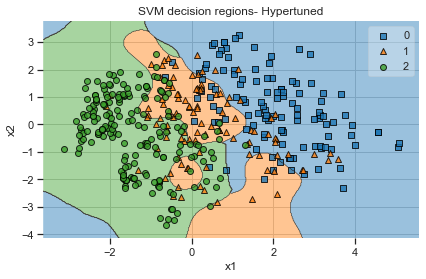

In [70]:
# Plotting decision regions
plot_decision_regions(X_test_reduced, y_test, clf=SVM_2, zoom_factor=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM decision regions- Hypertuned')
plt.show()

Although the GridSearch was able to converge and identify the optimal hyperparameters for the SVM classifier, the improvement to the model was insignificant. 

#  7. Evaluation 

In [92]:
print('The SVM Classifier with GridSearchCV has an accuracy score of {:0.2f}%.'.format( 100 * SVM_grid_accuracy))
print('The Random Forrest Classifier with GridSearchCV has an accuracy score of {:0.2f}%.'.format( 100 * rf_grid_accuracy))
print('The SVM Classifier with GridSearchCV has an f1 score of {:0.2f}%.'.format( 100 * SVM_grid_f1_score))
print('The Random Forrest Classifer with GridSearchCV has an f1 score of {:0.2f}%.'.format( 100 * rf_grid_f1_score))



The SVM Classifier with GridSearchCV has an accuracy score of 77.78%.
The Random Forrest Classifier with GridSearchCV has an accuracy score of 77.30%.
The SVM Classifier with GridSearchCV has an f1 score of 74.63%.
The Random Forrest Classifer with GridSearchCV has an f1 score of 74.90%.


**Model Selection**

We can conclude that the Random Forrest Classifer (max_features=2, n_estimators=1000, random_state=42) is the best model to conduct the Obesity Claassification task with. Not only did it outperform the SVM classifier after hypertuning, but Random Forrests will be able to scale with ease when the data set increases in size. 

**Next Steps**

- The model should be trained on a larger data set, with attributes more unformly distributed across ages and demographics and evaluated on a new test set. 
- The classification task could be undertaken with few attributes as some may not increase the predicting power of a model. 
- Consultation into the weighting of the precision/ recall threshold to understand the optimal threshold based on inaccuracy costs in the medical field for a long term health condition like obesity. 